In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score

df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preparing/Training/Testing the Dataset

In [213]:
df.shape

(284807, 31)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Our goal is to detect fraudulent Credit Card transactions/activities. Assuming that much of the data presented would be Class 0 - or non-fraudulent transactions - we'll seek an even undersampling of both fraudulent and non-fraudulent activities. 

Text(0,0.5,'Frequency')

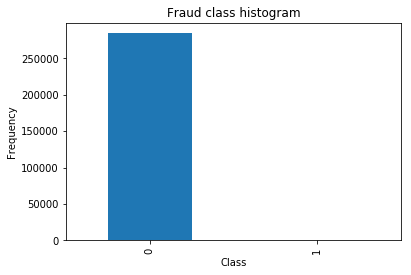

In [215]:
count_classes=pd.value_counts(df['Class'])
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Seeing how uneven the data is, we will proceed with the undersampling.

In [216]:
df['normAmount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df=df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [217]:
X=df.loc[:,df.columns!='Class']
Y=df.loc[:,df.columns=='Class']

In [218]:
fraud=len(df[df.Class==1])
fraud_index=np.array(df[df.Class==1].index)
non_fraud_index=df[df.Class==0].index
random_non_fraud=np.random.choice(non_fraud_index,fraud,replace=False)
random_non_fraud_index=np.array(random_non_fraud)
under_sample_index=np.concatenate([fraud_index,random_non_fraud_index])
under_sampling=df.iloc[under_sample_index,:]
X_undersampled=under_sample_data.loc[:,under_sampling.columns!='Class']
Y_undersampled=under_sample_data.loc[:,under_sampling.columns=='Class']
print("Normal transactions (%):",len(under_sampling[under_sampling.Class==0])/len(under_sampling))
print("Fraud transactions (%):",len(under_sampling[under_sampling.Class==1])/len(under_sampling))
print("Total number in data:", len(under_sampling))

Normal transactions (%): 0.5
Fraud transactions (%): 0.5
Total number in data: 984


In [221]:
#training size 60%, test size 40%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4, random_state=0)
X_train_undersampled,X_test_undersampled,Y_train_undersampled,Y_test_undersampled=train_test_split(X_undersampled,Y_undersampled,
                                                                                                   test_size=0.4,random_state=0)

## Decision Tree and Random Forest Classifiers

Fraud or No-fraud? Given the binary nature of this dataset, we will proceed with classifier tools Decision Tree (a little bit of) Random Forest. 

In [222]:
#Produce initial DT Classification report
clf=DecisionTreeClassifier()
clf.fit(X_train_undersampled,Y_train_undersampled)
pred=clf.predict(X_test_undersampled)
print(classification_report(Y_test_undersampled,pred))

             precision    recall  f1-score   support

          0       0.92      0.93      0.92       195
          1       0.93      0.92      0.92       199

avg / total       0.92      0.92      0.92       394



In [226]:
#Use RF Classifier to identify important features in our undersampled data
clf=RandomForestClassifier()
clf.fit(X_train_undersampled,Y_train_undersampled)
important_features=pd.Series(clf.feature_importances_,index=X_train_undersampled.columns).sort_values(ascending=False)
print(important_features)

V14           0.219110
V12           0.145652
V7            0.103351
V10           0.101782
V4            0.096003
V16           0.060411
V17           0.052495
V3            0.051991
V11           0.023077
normAmount    0.020147
V8            0.012826
V19           0.012185
V2            0.009652
V21           0.009627
V24           0.008562
V9            0.007051
V20           0.006896
V18           0.006623
V28           0.006381
V1            0.006228
V15           0.005307
V6            0.004872
V26           0.004756
V5            0.004745
V25           0.004618
V13           0.004554
V22           0.004521
V27           0.003771
V23           0.002808
dtype: float64


/Users/samuelkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


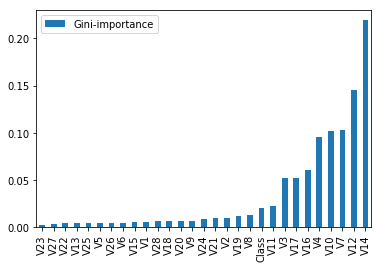

In [227]:
#Visualize columns by important features
feats={}
for feature,importance in zip(df.columns, clf.feature_importances_):
    feats[feature]=importance
importances=pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar',rot=90)
plt.show()

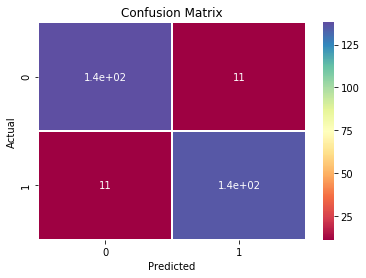

In [229]:
#Confusion matrix for Decision Tree
sns.heatmap(matrix,cmap="Spectral",annot=True,linewidths=0.3)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [230]:
#Assess Receiver Operating Characteristics (ROC), looking at False and True positives
false_positive,true_positive,thresholds=roc_curve(Y_test_undersampled,pred)
roc_auc=auc(false_positive,true_positive)
print(roc_auc)

0.9239015590774385


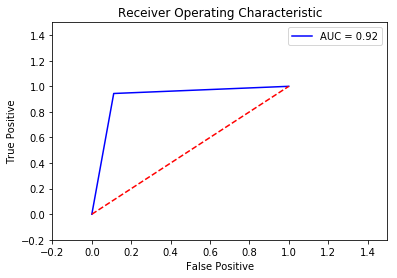

In [240]:
#Visualize ROC
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive,true_positive,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.2,1.5])
plt.ylim([-0.2,1.5])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

We will now use the top 8 columns with important features and compare the results. 

In [232]:
X_train_undersampled_new, X_test_undersampled_new, Y_train_undersampled_new, Y_test_undersampled_new = train_test_split(X_undersampled[['V14','V12','V7','V10','V4','V16','V17','V3']], Y_undersampled, 
                                                    test_size=0.40, random_state=50)

In [233]:
X_train_undersampled_new.head()

,V14,V12,V7,V10,V4,V16,V17,V3
128365,-0.066025,0.495516,-0.786304,-1.003697,-0.843303,0.056875,-0.509764,1.098834
138566,-0.961264,1.138202,0.701047,-0.471998,-0.321950,-0.403002,0.258828,1.736199
151007,-3.926207,-10.592305,-31.197329,-22.187089,8.904157,-6.809890,-12.462315,-30.177317
6971,-3.738023,-6.998042,5.431271,-1.987773,4.853894,-2.013543,-5.136135,-4.489558
178581,0.797040,0.232614,0.054796,0.190507,-0.720760,-0.721847,-0.169346,-3.386067


In [234]:
Y_train_undersampled_new.head()

,Class
128365,0
138566,0
151007,1
6971,1
178581,0


In [235]:
clf_new=DecisionTreeClassifier()
clf_new.fit(X_train_undersampled_new, Y_train_undersampled_new)
pred_new=clf_new.predict(X_test_undersampled_new)
print(classification_report(Y_test_undersampled_new, pred_new))

             precision    recall  f1-score   support

          0       0.94      0.89      0.91       198
          1       0.89      0.94      0.92       196

avg / total       0.92      0.92      0.92       394



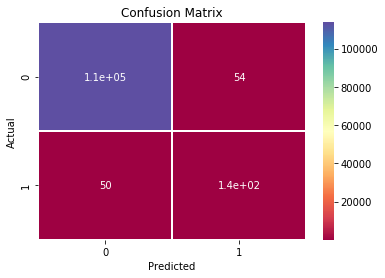

In [236]:
sns.heatmap(new_matrix, cmap="Spectral", annot=True, linewidths=0.3)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [238]:
false_positive,true_positive,thresholds=roc_curve(Y_test_undersampled_new,pred_new)
roc_auc_new=auc(false_positive, true_positive)
print(roc_auc_lr_new)

0.9163832199546483


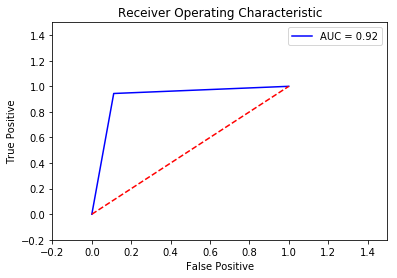

In [241]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive,true_positive,'b',label='AUC = %0.2f'%roc_auc_new)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.2,1.5])
plt.ylim([-0.2,1.5])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()

Using just the top 8 columns, we achieved similar outcomes! 